# UNIVERSIDAD EIA: Proyecto Levitador Neumatico
##### Juan José Londoño David y Idekel Plaza

In [2]:
! pip install pyserial
! pip install matplotlib
! pip install pandas
! pip install seaborn

^C



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### ENTRADA AL ESCALON JUNTO CON LECTURA Y ESCRITURA DE PUERTO SERIAL EN CSV

In [100]:
import serial
import csv
import time
import re
from datetime import datetime

COM_PORT = 'COM4'
BAUD_RATE = 115200
CSV_FILENAME = 'serial_data_32p_stable.csv'
pwm_value = 30  # Set your desired PWM % here (0–100)

def initialize_and_set_power(port, baud, pwm_val):
    """
    Opens the serial port, sends the power command, and returns the serial object.
    Returns None if it fails.
    """
    ser = None
    try:
        print(f"Initializing port {port} and setting power with PWM: {pwm_val}...")
        ser = serial.Serial(port, baud, timeout=1)
        time.sleep(2)  # Wait for the serial connection to establish and device to be ready

        command = f'SET {pwm_val}\n'
        ser.write(command.encode())
        print(f"Command '{command.strip()}' sent to {port}.")
        # Optional: Check for an acknowledgment if your device sends one
        # response = ser.readline().decode().strip()
        # if response:
        #    print(f"Response from device after SET: {response}")
        # else:
        #    print(f"No immediate response after SET command.")
        print(f"Port {port} initialized and power set. Port remains open.")
        return ser # Return the opened serial object

    except serial.SerialException as se:
        print(f"Serial Error in initialize_and_set_power: {se}")
        if ser and ser.is_open:
            ser.close()
        return None
    except Exception as e:
        print(f"Error in initialize_and_set_power: {e}")
        if ser and ser.is_open:
            ser.close()
        return None

def parse_data(line):
    try:
        match = re.search(r'PWM:\s*(\d+)\s+RPM:\s*(\d+)\s+Distance:\s*(\d+)', line)
        if match:
            pwm = int(match.group(1))
            rpm = int(match.group(2))
            distance = float(match.group(3))
            return pwm, rpm, distance
    except Exception as e:
        print(f"Parse error: {e} on line: '{line}'")
    return None

def main(ser_object):
    """
    Reads data from the provided serial object and writes to CSV.
    """
    if not ser_object or not ser_object.is_open:
        print("Serial port is not open or available. Exiting main function.")
        return

    print(f"Using pre-opened serial port {ser_object.name} for data logging.")
    try:
        with open(CSV_FILENAME, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Timestamp", "PWM", "Distance_cm"])  # CSV header

            print(f"Reading and saving serial data to {CSV_FILENAME}. Press Ctrl+C to stop.\n")

            while True:
                if ser_object.in_waiting > 0:
                    line = ser_object.readline().decode('utf-8', errors='ignore').strip()
                    if not line:
                        continue
                    parsed = parse_data(line)
                    if parsed:
                        timestamp = datetime.now().strftime('%M:%S.%f')[:-3]  # Format: MM:SS.mmm
                        pwm, rpm, distance = parsed
                        writer.writerow([timestamp, pwm, distance])
                        print(f"{timestamp} | PWM: {pwm} | RPM: {rpm} | Distance: {distance} cm")
                time.sleep(0.01)

    except KeyboardInterrupt:
        print("\nStopped by user.")
    except serial.SerialException as se:
        print(f"Serial Error during main loop: {se}")
    except IOError as ioe:
        print(f"Failed to open or write to CSV file {CSV_FILENAME}: {ioe}")
    except Exception as e:
        print(f"An error occurred in main: {e}")
    finally:
        if ser_object and ser_object.is_open:
            print(f"Closing serial port {ser_object.name} from main.")
            ser_object.close()

if __name__ == "__main__":
    # Initialize the serial port and set power
    active_serial_port = initialize_and_set_power(COM_PORT, BAUD_RATE, pwm_value)

    if active_serial_port:
        # If initialization was successful, proceed to the main data logging function
        main(active_serial_port)
    else:
        print("Failed to initialize serial port and set power. Program will not log data.")

    print("Program finished.")

Initializing port COM4 and setting power with PWM: 30...
Command 'SET 30' sent to COM4.
Port COM4 initialized and power set. Port remains open.
Using pre-opened serial port COM4 for data logging.
Reading and saving serial data to serial_data_32p_stable.csv. Press Ctrl+C to stop.

54:01.955 | PWM: 0 | RPM: 708 | Distance: 1.0 cm
54:01.965 | PWM: 0 | RPM: 1062 | Distance: 1.0 cm
54:01.977 | PWM: 0 | RPM: 708 | Distance: 0.0 cm
54:01.989 | PWM: 0 | RPM: 1062 | Distance: 0.0 cm
54:01.999 | PWM: 0 | RPM: 708 | Distance: 0.0 cm
54:02.010 | PWM: 0 | RPM: 1062 | Distance: 0.0 cm
54:02.022 | PWM: 0 | RPM: 708 | Distance: 0.0 cm
54:02.033 | PWM: 0 | RPM: 1062 | Distance: 0.0 cm
54:02.044 | PWM: 0 | RPM: 708 | Distance: 0.0 cm
54:02.056 | PWM: 0 | RPM: 1062 | Distance: 0.0 cm
54:02.077 | PWM: 29 | RPM: 708 | Distance: 0.0 cm
54:02.089 | PWM: 29 | RPM: 1062 | Distance: 0.0 cm
54:02.101 | PWM: 29 | RPM: 1062 | Distance: 0.0 cm
54:02.153 | PWM: 29 | RPM: 708 | Distance: 0.0 cm
54:02.206 | PWM: 29 | 

### Apagar Experimento

In [104]:
import serial
import time

pwm_value = 0  # Set your desired PWM % here (0–100)

try: 
    ser = serial.Serial('COM4', 115200, timeout=1)
    time.sleep(2)

    command = f'SET {pwm_value}\n'
    ser.write(command.encode())

except Exception as e:
    print("Error:", e)

finally:
    if ser and ser.is_open:
        ser.close()

### Visualizacion Del CSV Generado con MatplotLib y Seaborn

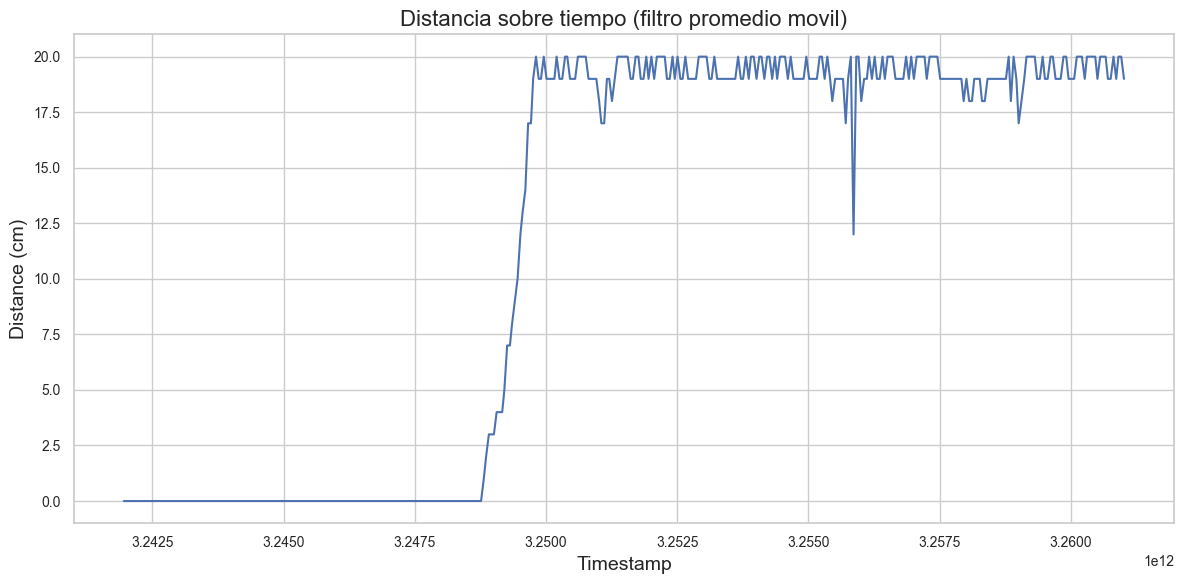

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
CSV_FILENAME = 'serial_data_32p_entrega_filtered.csv'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Leer CSV
df = pd.read_csv(CSV_FILENAME)
df['Smoothed_Distance'] = df['Distance_cm'].rolling(window=5, center=True).mean()
# Convertir 'Timestamp' a formato de tiempo
df['Timestamp'] = pd.to_timedelta('00:' + df['Timestamp'])
# Create the plot
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
plt.plot(df['Timestamp'], df['Distance_cm'], linestyle='-')

# Formatting the plot
plt.title('Distancia sobre tiempo (filtro promedio movil)')
plt.xlabel('Timestamp')
plt.ylabel('Distance (cm)')
plt.grid(True) # Add a grid for easier reading

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()